In [1]:
%pylab
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Ejercicio 2: 
# En el conjunto de datos Baskeball.csv se encuentran las siguientes columnas para diferentes jugadores:

### X1: altura en pies
### X2: peso en libras
### X3: porcentaje de tiros de campo exitosos
### X4: porcentaje de tiros libres exitosos
### X5: puntos promedio anotados por juego
### Intentar predecir el porcentaje de tiros de campo exitosos para un jugador en base al resto de variables utilizando la regresión lineal y regresión LASSO con parámetros alpha de 0.01, 0.1 y 0.5.

## Cuestiones:

### ¿Cuál es el R2 en cada caso?
### ¿Cuántas variables quedan disponibles al finalizar la regresión LASSO con cada valor de alpha?
### Nota: En este caso no se ha de separar los datos en conjunto de entrenamiento y test. Se ha de trabajar siempre con el conjunto de datos completo.

In [55]:
def forward_regression(x, y):
    # Obtencion del conjunto de datos para validación
    #x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model_lasso = Lasso(alpha=0.1)

    # Variable para almecena los índices de la lista de atributos usados
    feature_list = list(x.columns)
    feature_order = []
    feature_error = []
    feature_names = []

    # Iteración sobre todas las variables
    for i in range(len(feature_list)):
        idx_try = [val for val in range(len(feature_list)) if val not in feature_order]
        iter_error = []

        for i_try in idx_try:
            useRow = feature_order[:]
            useRow.append(i_try)

            use = x[x.columns[useRow]]

            model_lasso.fit(use, y)
            rmsError = numpy.linalg.norm((y - model_lasso.predict(use)), 2)/sqrt(len(y))
            iter_error.append(rmsError)

        pos_best = numpy.argmin(iter_error)
        
        if len(feature_error) == 0 or (iter_error[pos_best] < feature_error[-1]):
            feature_order.append(idx_try[pos_best])
            feature_error.append(iter_error[pos_best])
            feature_names.append(feature_list[idx_try[pos_best]])
            print("Paso", len(feature_error), "variable", feature_list[idx_try[pos_best]], "con RMS", iter_error[pos_best])
        else:
            return feature_names, feature_error, feature_names

    return feature_names, feature_order, feature_error

In [2]:
data = pd.read_csv('Basketball.csv')

In [3]:
data.head()

,X1,X2,X3,X4,X5
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [4]:
data.describe()

,X1,X2,X3,X4,X5
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009C103A5470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000009C1663A128>]], dtype=object)

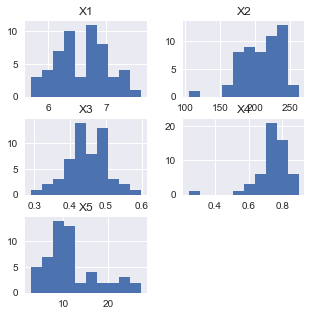

In [5]:
data.hist(figsize = (5, 5))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separación de la variable objetivo y las explicativas
map_columns = ['altura en pies','peso en libras','porcentaje de tiros libres exitosos','puntos promedio anotados por juego']
target = 'X3'
features = list(data.columns)
features.remove('X3')

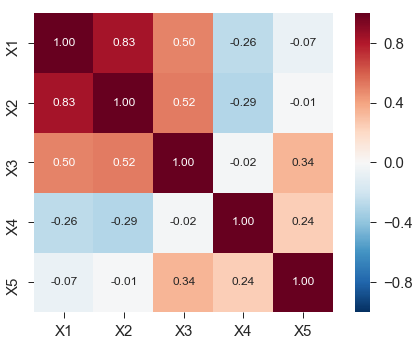

In [7]:
from pandas.plotting import scatter_matrix
#scatter_matrix(data, figsize = (5, 5), diagonal = 'kde');

cols = ['X1','X2','X3','X4','X5']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5,style="ticks", color_codes=True)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols,xticklabels=cols)
plt.show()

In [8]:
x = data[features] 
y = data[target]

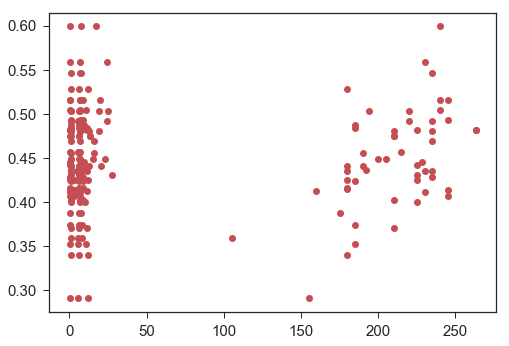

In [9]:
plt.plot(x, y, 'ro')
plt.show()

# Regresión Lineal

In [67]:
model = LinearRegression()
model.fit(x,y)
#print(model.coef_)
#print(model.intercept_)

predict = model.predict(x)

print ("=============================")
print ("¿Cuál es el R2?")
print ("=============================")
print('R2: ', model.score(x, y))
print ("=============================")
print('')
#print('====================')
#print('Forward Regression:')
#forward_regression(x, y)
#print('====================')
print('')

¿Cuál es el R2?
R2:  0.411865449032




# Regresión LASSO

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
learning_rate = [0.01, 0.1, 0.5]

for lr in learning_rate:
    var_select= []
    model_lasso = Lasso(alpha=lr)
    model_lasso.fit(x, y)

    predict_test_lasso = model_lasso.predict(x)

    print('====================')
    print('Alpha:',lr)
    print('====================')
    print ("¿Cuál es el R2?")
    print('R2 : ', model_lasso.score(x, y))
    
    index = list(0.!=model_lasso.coef_)
    for col in range(0,len(map_columns)):        
            if index[col]==True:                
                var_select.append(map_columns[col])
    print('Variables Seleccionadas:',len(var_select))
    print(var_select)
    print(model_lasso.coef_)
    print('')
    scores = cross_val_score(model_lasso, x, y, cv=5)    
    print('La medida de los R2 es:', scores.mean())
    print('Los R2 son:',scores)
    print('====================')
    print('')
    print('====================')
    print('Forward Regression:')
    forward_regression(x, y)
    print('====================')
    print('')

Alpha: 0.01
¿Cuál es el R2?
R2 :  0.383574053121
Variables Seleccionadas: 2
['peso en libras', 'puntos promedio anotados por juego']
[ 0.          0.0009589   0.          0.00300308]

La medida de los R2 es: 0.029479018656
Los R2 son: [-1.39587815  0.42645293  0.45353441  0.32482298  0.33846292]

Forward Regression:
Paso 1 variable X2 con RMS 0.0481047110862
Paso 2 variable X5 con RMS 0.0472954100186

Alpha: 0.1
¿Cuál es el R2?
R2 :  0.28736215903
Variables Seleccionadas: 2
['peso en libras', 'puntos promedio anotados por juego']
[ 0.          0.00085372  0.          0.00036286]

La medida de los R2 es: 0.137675174394
Los R2 son: [-0.20189488  0.16586057  0.20897211  0.27001644  0.24542164]

Forward Regression:
Paso 1 variable X2 con RMS 0.0481047110862
Paso 2 variable X5 con RMS 0.0472954100186

Alpha: 0.5
¿Cuál es el R2?
R2 :  0.177714068234
Variables Seleccionadas: 1
['peso en libras']
[ 0.          0.00040809  0.          0.        ]

La medida de los R2 es: 0.100029719602
Los R2 s

In [14]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
#print(len(x_train),len(x_test),len(x))

#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
#print(len(x_train),len(x_test),len(x_val),len(x))


43 11 54
